Processed 67 lines.
Processed 468 lines.


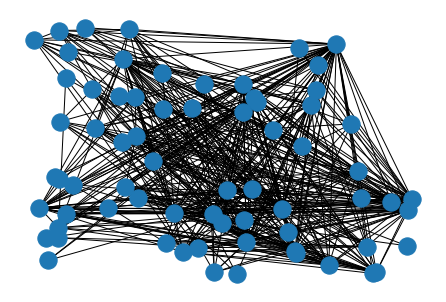

In [3]:
#Read networks from file 

import networkx as nx 
import csv
import matplotlib.pyplot as plt

G = nx.Graph() # create an empty graph


with open('nodes_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_node(row[0])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
    print(f'Processed {line_count} lines.')



with open('edges_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_edge(row[0], row[1])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
    print(f'Processed {line_count} lines.')


    
#draw different layouts    
nx.draw_random(G)
#nx.draw_circular(G)
#nx.draw_spectral(G)
#nx.draw(G)
plt.show()
    
#data = read_csv('edges_countries.csv')

#G = nx.read_edgelist(data, delimiter=';', nodetype=str)

### Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:


In [ ]:


nx.connected_components(G)
#[[1, 2, 3], ['spam']]

sorted(nx.degree(G).values())
#[0, 1, 1, 2]

nx.clustering(G)
#{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}


nx.degree(G)
#Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}

